In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('claimants.csv')

In [ ]:
df.head(20)

CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0         5         0     0.0       1.0       0.0    50.0  34.940
1         3         1     1.0       0.0       0.0    18.0   0.891
2        66         1     0.0       1.0       0.0     5.0   0.330
3        70         0     0.0       1.0       1.0    31.0   0.037
4        96         1     0.0       1.0       0.0    30.0   0.038
5        97         0     1.0       1.0       0.0    35.0   0.309
6        10         0     0.0       1.0       0.0     9.0   3.538
7        36         0     1.0       1.0       0.0    34.0   4.881
8        51         1     1.0       1.0       0.0    60.0   0.874
9        55         1     0.0       1.0       0.0     NaN   0.350
10       61         0     1.0       1.0       0.0    37.0   6.190
11      148         0     0.0       1.0       0.0    41.0  19.610
12      150         1     0.0       1.0       0.0     7.0   1.678
13      150         0     1.0       1.0       0.0    40.0   0.673
14      169         1     1.0       1.0       0.0    37.0   0.143
15      171         1     1.0       0.0       0.0     9.0   0.053
16      334         1     1.0       1.0       0.0    58.0   0.050
17      360         0     0.0       1.0       0.0    58.0   0.758
18      376         1     0.0       1.0       0.0     3.0   0.000
19      401         0     1.0       1.0       0.0    38.0   4.754

In [ ]:
df.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [ ]:
df.describe()

CASENUM     ATTORNEY       CLMSEX     CLMINSUR     SEATBELT  \
count   1340.000000  1340.000000  1328.000000  1299.000000  1292.000000   
mean   11202.001493     0.488806     0.558735     0.907621     0.017028   
std     9512.750796     0.500061     0.496725     0.289671     0.129425   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%     4177.000000     0.000000     0.000000     1.000000     0.000000   
50%     8756.500000     0.000000     1.000000     1.000000     0.000000   
75%    15702.500000     1.000000     1.000000     1.000000     0.000000   
max    34153.000000     1.000000     1.000000     1.000000     1.000000   

            CLMAGE         LOSS  
count  1151.000000  1340.000000  
mean     28.414422     3.806307  
std      20.304451    10.636903  
min       0.000000     0.000000  
25%       9.000000     0.400000  
50%      30.000000     1.069500  
75%      43.000000     3.781500  
max      95.000000   173.604000

In [ ]:
df = df.drop('CASENUM',axis = 1)

In [ ]:
df.shape

(1340, 6)

In [ ]:
df.head()

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0         0     0.0       1.0       0.0    50.0  34.940
1         1     1.0       0.0       0.0    18.0   0.891
2         1     0.0       1.0       0.0     5.0   0.330
3         0     0.0       1.0       1.0    31.0   0.037
4         1     0.0       1.0       0.0    30.0   0.038

In [ ]:
df.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(1096, 6)

In [ ]:
df.to_csv('df.csv')

In [ ]:
X = df.drop('ATTORNEY',axis = 1)
y = df['ATTORNEY']

In [ ]:
y.value_counts()

0    578
1    518
Name: ATTORNEY, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()
log.fit(X,y)

LogisticRegression()

In [ ]:
y_pred = log.predict(X)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
df['y_pred'] = y_pred

In [ ]:
df

ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS  0  1  y_pred
0            0     0.0       1.0       0.0    50.0  34.940  0  1       0
1            1     1.0       0.0       0.0    18.0   0.891  0  1       1
2            1     0.0       1.0       0.0     5.0   0.330  0  1       1
3            0     0.0       1.0       1.0    31.0   0.037  0  1       0
4            1     0.0       1.0       0.0    30.0   0.038  0  1       1
...        ...     ...       ...       ...     ...     ... .. ..     ...
1334         1     1.0       1.0       0.0    16.0   0.060  0  1       1
1336         0     1.0       1.0       0.0    46.0   3.705  0  1       0
1337         1     1.0       1.0       0.0    39.0   0.099  0  1       1
1338         0     1.0       0.0       0.0     8.0   3.177  0  1       0
1339         1     1.0       1.0       0.0    30.0   0.688  0  1       1

[1096 rows x 9 columns]

In [ ]:
y

0       0
1       1
2       1
3       0
4       1
       ..
1334    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1096, dtype: int64

In [ ]:
y_pred[0:3]

array([0, 1, 1], dtype=int64)

In [ ]:
log.predict_proba(X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [ ]:
y_pred_df = pd.DataFrame({'actual': y,
                          # 'prob': classifier.predict_proba(X)[:,1],
                         'predicted': log.predict(X),
                         'p_0': [x[0] for x in log.predict_proba(X)],
                         'p_1': [x[1] for x in log.predict_proba(X)]})

In [ ]:
y_pred_df.head(50)

actual  predicted       p_0       p_1
0        0          0  0.999997  0.000003
1        1          1  0.492851  0.507149
2        1          1  0.424833  0.575167
3        0          0  0.502210  0.497790
4        1          1  0.359246  0.640754
5        0          1  0.282098  0.717902
6        0          0  0.711678  0.288322
7        0          0  0.696195  0.303805
8        1          1  0.293084  0.706916
10       0          0  0.787949  0.212051
11       0          0  0.998963  0.001037
12       1          0  0.550310  0.449690
13       0          1  0.304300  0.695700
14       1          1  0.266796  0.733204
15       1          1  0.427576  0.572424
16       1          1  0.234335  0.765665
17       0          1  0.381057  0.618943
18       1          1  0.397310  0.602690
19       0          0  0.680112  0.319888
21       1          1  0.263275  0.736725
22       0          0  0.997839  0.002161
24       1          0  0.957208  0.042792
25       1          1  0.367917  0.632083
26       1          1  0.323375  0.676625
27       0          1  0.439929  0.560071
28       1          1  0.376835  0.623165
30       1          0  0.647054  0.352946
32       1          1  0.444179  0.555821
33       0          1  0.398921  0.601079
34       0          0  0.684116  0.315884
35       0          0  0.604526  0.395474
36       0          0  0.668736  0.331264
37       0          0  0.567295  0.432705
38       1          1  0.385911  0.614089
39       0          0  0.574699  0.425301
40       1          1  0.432408  0.567592
41       0          0  0.933362  0.066638
42       0          0  0.879089  0.120911
43       1          0  0.979165  0.020835
44       1          1  0.437082  0.562918
46       0          0  0.676468  0.323532
47       1          1  0.400445  0.599555
49       0          0  0.630076  0.369924
50       0          0  0.623191  0.376809
51       1          1  0.407206  0.592794
54       0          1  0.360090  0.639910
55       0          0  0.999996  0.000004
57       0          0  0.904952  0.095048
58       1          1  0.257644  0.742356
59       1          1  0.479210  0.520790

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report


In [ ]:
confusion_matrix(y,y_pred)

array([[381, 197],
       [123, 395]], dtype=int64)

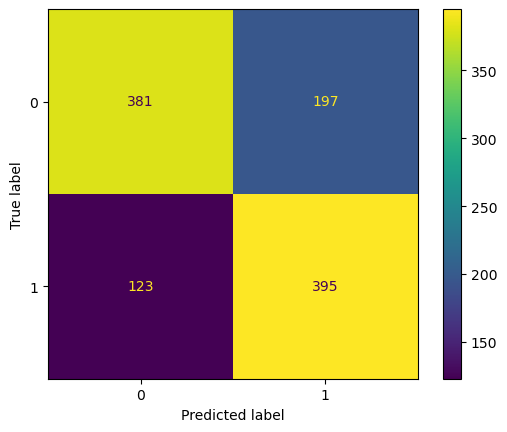

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y,y_pred)

In [ ]:
(381+395)/1096

0.708029197080292

In [ ]:
381/(381+123)

0.7559523809523809

In [ ]:
accuracy_score(y,y_pred)

0.708029197080292

In [ ]:
precision_score(y,y_pred)

0.6672297297297297

In [ ]:
recall_score(y,y_pred)

0.7625482625482626

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096

